Principal Component Analysis from Scratch


All the required libraries are imported here


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

Reading heart data from csv and showing its output


In [5]:
allData = pd.read_csv('heart.csv')
print(allData.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Removing last output column from dataFrame to have a clear picture of PCA

In [40]:
dataWithoutOutput = allData.drop('output', axis= 1)
print(dataWithoutOutput.head())

output = allData['output']
print(output)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


In [20]:
standardizedData = StandardScaler().fit_transform(dataWithoutOutput)
print(standardizedData)
print(standardizedData.shape)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]
(303, 13)


In [22]:
covarianceMatrix = np.matmul(standardizedData.T, standardizedData)
print(covarianceMatrix)
print('Shape of covariance Matrix is ',covarianceMatrix.shape)

[[ 303.          -29.82932055  -20.8018638    84.64332469   64.74442084
    36.75621737  -35.21190214 -120.75214725   29.33065042   63.63380791
   -51.15071412   83.72685194   20.60441725]
 [ -29.82932055  303.          -14.95392123  -17.20095366  -59.96738876
    13.64463213  -17.63346911  -13.33803205   42.92413473   29.11614175
    -9.30530189   35.83320824   63.64245198]
 [ -20.8018638   -14.95392123  303.           14.42515148  -23.30203048
    28.6165426    13.45943953   89.61592375 -119.46692135  -45.2167379
    36.27412633  -54.85906689  -49.00587786]
 [  84.64332469  -17.20095366   14.42515148  303.           37.32178458
    53.79175421  -34.57314428  -14.14941163   20.48768422   58.54459114
   -36.80679832   30.72086255   18.84959595]
 [  64.74442084  -59.96738876  -23.30203048   37.32178458  303.
     4.02796148  -45.76514374   -3.01177111   20.30790312   16.34743176
    -1.22344442   21.36481034   29.93730673]
 [  36.75621737   13.64463213   28.6165426    53.79175421    4.0

Generating Eigen Vecor and Eigen Values of Covariance Matrix

In [69]:
eigenValues, eigenVector = eigh(covarianceMatrix, eigvals=(11,12))

In [70]:
print(eigenValues)

eigenVector = eigenVector.T
print(eigenVector.shape)
print(eigenVector)

[112.67380134 128.21214138 160.62174368 188.33576626 217.83442781
 235.11144963 261.41928791 293.91480763 309.65586161 357.88709029
 370.51879274 465.61767726 837.19715247]
(13, 13)
[[ 0.18181083  0.06093808  0.00635061  0.0201296  -0.00745311 -0.12716692
   0.07444225  0.31669181  0.14872674 -0.61457545 -0.64516376  0.15626403
   0.01568971]
 [ 0.54823509 -0.01101603 -0.09720829 -0.25872142 -0.18379048  0.02472959
  -0.00269438  0.60891132  0.2390786   0.34083261  0.13356599 -0.14603038
  -0.07259319]
 [ 0.14054369  0.28760018 -0.59428374  0.06413037  0.10887361  0.14210271
   0.09554476  0.03250678 -0.61590127  0.01524183 -0.16879774 -0.29673948
  -0.04361098]
 [ 0.01672242 -0.53561904 -0.16435134 -0.07152427 -0.49516986  0.15369572
  -0.2699657  -0.03081265 -0.19873186 -0.11138417 -0.05593369 -0.03532497
   0.53083127]
 [-0.37900026 -0.1989252  -0.35143235  0.35039179 -0.1539752  -0.17700437
  -0.03830435  0.37204449 -0.05850023  0.23360295 -0.02850469  0.48580844
  -0.28420109]
 [-

In [57]:
finalPCAData = np.matmul(eigenVector, standardizedData.T)

print(finalPCAData)
print(finalPCAData.shape)
print(output.shape)

[[-2.32127028e+00  9.57350982e-01 -4.28847737e-02  4.95337323e-01
  -3.01156175e-01  3.82882350e-01 -1.46021954e+00  1.15199470e+00
  -1.17802505e+00 -6.00440468e-02  4.31111662e-01 -6.66082010e-01
   3.62122452e-01  3.66100880e-01 -3.31505033e+00 -3.38842792e-02
  -1.44304375e+00 -1.56563220e+00  5.93288357e-01 -2.04509682e+00
   7.39533549e-01  1.05478211e+00  9.44816640e-01 -9.21609753e-01
   1.31154957e+00 -2.60255695e+00 -1.29433620e+00  1.28905546e+00
  -4.11799172e+00 -6.83863299e-01  9.04060838e-01  1.23607299e+00
   4.11500959e-01 -3.70030395e-01  4.34762882e-01  9.36466989e-02
  -2.27149641e+00 -4.38220805e-01 -2.01456281e+00 -3.21168571e+00
  -1.74775482e+00  1.64062709e-01  2.29447547e+00 -5.82251192e-01
  -6.01398620e-01  4.09448669e-02 -2.12736619e-01 -3.70308829e-01
  -1.42913226e+00 -7.25685018e-01 -1.10788521e+00 -3.97205643e-01
   7.42857672e-03  9.81680314e-01 -1.84323020e+00  5.46593725e-01
   7.06723512e-01  7.52005344e-01  8.91051335e-01 -1.22947541e+00
  -2.50933

In [60]:
finalPCAData = np.vstack((finalPCAData, output)).T
print(finalPCAData.shape)

(303, 3)


In [61]:
finalDataFrame = pd.DataFrame(data = finalPCAData, columns=('1st', '2nd', 'Output'))

In [62]:
print(finalDataFrame)

          1st       2nd  Output
0   -2.321270  0.624111     1.0
1    0.957351 -0.455988     1.0
2   -0.042885 -1.828805     1.0
3    0.495337 -1.716006     1.0
4   -0.301156 -0.371356     1.0
..        ...       ...     ...
298  0.519529  1.146672     0.0
299  1.045752 -0.708593     0.0
300 -0.478262  2.459005     0.0
301  2.336816  1.762755     0.0
302 -1.068516 -0.860057     0.0

[303 rows x 3 columns]


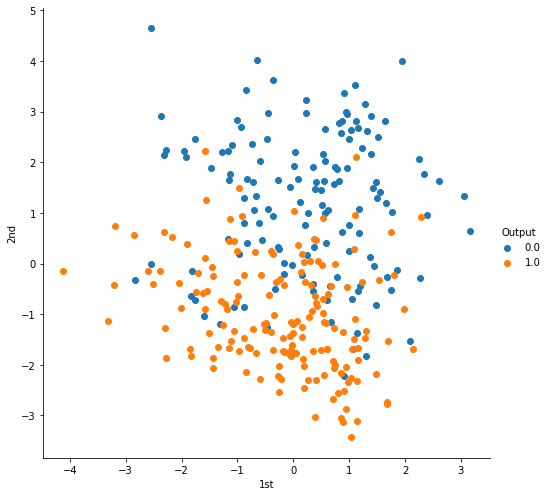

In [64]:
sn.FacetGrid(finalDataFrame, hue='Output', height=7).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()